<a href="https://colab.research.google.com/github/afiorg9000/WOMXN/blob/main/enclothed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -q https://gist.githubusercontent.com/FurkanGozukara/be7be5f9f7820d0bb85a3052874f184e/raw/d8d179da6cab0735bd5832029c2dec5163db87b4/train_dreambooth.py
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/scripts/convert_diffusers_to_original_stable_diffusion.py
%pip uninstall torchtext --yes
%pip install -qq git+https://github.com/ShivamShrirao/diffusers
%pip install torch==2.2.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 --upgrade
%pip install -q -U --pre triton --upgrade
%pip install -q accelerate transformers ftfy gradio natsort safetensors
%pip install bitsandbytes==0.41.3  --upgrade
%pip install xformers==0.0.24  --upgrade
%pip install triton==2.2.0 --upgrade
%pip install diffusers==0.27.0 --upgrade

Found existing installation: torchtext 0.17.1
Uninstalling torchtext-0.17.1:
  Successfully uninstalled torchtext-0.17.1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.3/757.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#@markdown If model weights should be saved directly in google drive (takes around 4-5 GB).
save_to_gdrive = True #@param {type:"boolean"}
if save_to_gdrive:
    from google.colab import drive
    drive.mount('/content/drive')

#@markdown Name/Path of the initial model.
MODEL_NAME = "runwayml/stable-diffusion-v1-5" #@param {type:"string"}

#@markdown Enter the directory name to save model at.

OUTPUT_DIR = "stable_diffusion_weights/ohwx" #@param {type:"string"}
if save_to_gdrive:
    OUTPUT_DIR = "/content/drive/MyDrive/" + OUTPUT_DIR
else:
    OUTPUT_DIR = "/content/" + OUTPUT_DIR

print(f"[*] Weights will be saved at {OUTPUT_DIR}")

!mkdir -p $OUTPUT_DIR

Mounted at /content/drive
[*] Weights will be saved at /content/drive/MyDrive/stable_diffusion_weights/ohwx


Add `--gradient_checkpointing` flag for around 9.92 GB VRAM usage.

remove `--use_8bit_adam` flag for full precision. Requires 15.79 GB with `--gradient_checkpointing` else 17.8 GB.

remove `--train_text_encoder` flag to reduce memory usage further, degrades output quality.

In [ ]:
# You can also add multiple concepts here. Try tweaking `--max_train_steps` accordingly.

concepts_list = [
    {
        "instance_prompt":      "sofiendez_512x512 woman",
        "class_prompt":         "full body photo of woman",
        "instance_data_dir":    "/content/data/sofiendez_512x512",
        "class_data_dir":       "/content/data/woman"
    },
#     {
#         "instance_prompt":      "photo of ukj person",
#         "class_prompt":         "photo of a person",
#         "instance_data_dir":    "/content/data/ukj",
#         "class_data_dir":       "/content/data/person"
#     }
]

# `class_data_dir` contains regularization images
import json
import os
for c in concepts_list:
    os.makedirs(c["instance_data_dir"], exist_ok=True)

with open("concepts_list.json", "w") as f:
    json.dump(concepts_list, f, indent=4)

In [ ]:
#@markdown Upload your images by running this cell.

#@markdown OR

#@markdown You can use the file manager on the left panel to upload (drag and drop) to each `instance_data_dir` (it uploads faster). You can also upload your own class images in `class_data_dir` if u don't wanna generate with SD.

import os
from google.colab import files
import shutil

for c in concepts_list:
    print(f"Uploading instance images for `{c['instance_prompt']}`")
    uploaded = files.upload()
    for filename in uploaded.keys():
        dst_path = os.path.join(c['instance_data_dir'], filename)
        shutil.move(filename, dst_path)

Uploading instance images for `sofiendez_512x512 woman`


Saving sofiendez_5120512.jpeg to sofiendez_5120512.jpeg
Saving sofiendez_5121512.jpeg to sofiendez_5121512.jpeg
Saving sofiendez_5122512.jpeg to sofiendez_5122512.jpeg
Saving sofiendez_5123512.jpeg to sofiendez_5123512.jpeg
Saving sofiendez_5124512.jpeg to sofiendez_5124512.jpeg
Saving sofiendez_5125512.jpeg to sofiendez_5125512.jpeg
Saving sofiendez_5126512.jpeg to sofiendez_5126512.jpeg
Saving sofiendez_5127512.jpeg to sofiendez_5127512.jpeg
Saving sofiendez_5128512.jpeg to sofiendez_5128512.jpeg
Saving sofiendez_5129512.jpeg to sofiendez_5129512.jpeg
Saving sofiendez_51210512.jpeg to sofiendez_51210512.jpeg
Saving sofiendez_51211512.jpeg to sofiendez_51211512.jpeg
Saving sofiendez_51212512.jpeg to sofiendez_51212512.jpeg
Saving sofiendez_51213512.jpeg to sofiendez_51213512.jpeg
Saving sofiendez_51214512.jpeg to sofiendez_51214512.jpeg
Saving sofiendez_51215512.jpeg to sofiendez_51215512.jpeg
Saving sofiendez_51216512.jpeg to sofiendez_51216512.jpeg
Saving sofiendez_51217512.jpeg to 

In [ ]:
!python3 train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --pretrained_vae_name_or_path="stabilityai/sd-vae-ft-mse" \
  --output_dir=$OUTPUT_DIR \
  --revision="fp16" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --seed=1337 \
  --resolution=512 \
  --train_batch_size=1 \
  --train_text_encoder \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --gradient_accumulation_steps=1 \
  --learning_rate=1e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=256 \
  --num_class_images=50 \
  --sample_batch_size=4 \
  --max_train_steps=2560 \
  --save_interval=10000 \
  --save_sample_prompt="photo sofiendez_512x512 woman" \
  --concepts_list="concepts_list.json"

# Reduce the `--save_interval` to lower than `--max_train_steps` to save weights from intermediate steps.
# `--save_sample_prompt` can be same as `--instance_prompt` to generate intermediate samples (saved along with weights in samples directory).

2024-04-20 23:33:02.480459: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 23:33:02.480520: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 23:33:02.623085: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-20 23:33:05.424368: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
config.json: 100% 547/547 [00:00<00:00, 3.29MB/s]
diffusion_pytorch_model.safetensors: 100% 335M/335M [00:03<00:00, 103MB/s]
model_index.json: 100% 543/543 [00:00<00:00, 3.20MB/s]
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/p

In [ ]:
WEIGHTS_DIR = "" #@param {type:"string"}
if WEIGHTS_DIR == "":
    from natsort import natsorted
    from glob import glob
    import os
    WEIGHTS_DIR = natsorted(glob(OUTPUT_DIR + os.sep + "*"))[-1]
print(f"[*] WEIGHTS_DIR={WEIGHTS_DIR}")

[*] WEIGHTS_DIR=/content/drive/MyDrive/stable_diffusion_weights/ohwx/2560


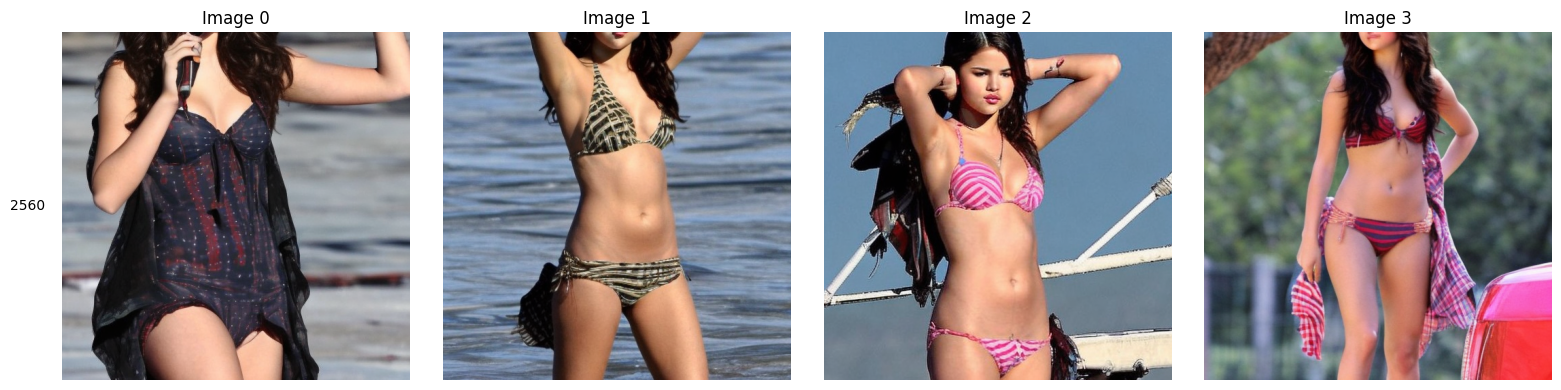

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

weights_folder = OUTPUT_DIR
folders = sorted([f for f in os.listdir(weights_folder) if f != "0"], key=lambda x: int(x))

row = len(folders)
col = len(os.listdir(os.path.join(weights_folder, folders[0], "samples")))
scale = 4
fig, axes = plt.subplots(row, col, figsize=(col*scale, row*scale), gridspec_kw={'hspace': 0, 'wspace': 0})

for i, folder in enumerate(folders):
    folder_path = os.path.join(weights_folder, folder)
    image_folder = os.path.join(folder_path, "samples")
    images = [f for f in os.listdir(image_folder)]
    for j, image in enumerate(images):
        if row == 1:
            currAxes = axes[j]
        else:
            currAxes = axes[i, j]
        if i == 0:
            currAxes.set_title(f"Image {j}")
        if j == 0:
            currAxes.text(-0.1, 0.5, folder, rotation=0, va='center', ha='center', transform=currAxes.transAxes)
        image_path = os.path.join(image_folder, image)
        img = mpimg.imread(image_path)
        currAxes.imshow(img, cmap='gray')
        currAxes.axis('off')

plt.tight_layout()
plt.savefig('grid.png', dpi=72)

In [ ]:
#@markdown Run conversion.
ckpt_path = WEIGHTS_DIR + "/model.ckpt"

half_arg = ""
#@markdown  Whether to convert to fp16, takes half the space (2GB).
fp16 = True #@param {type: "boolean"}
if fp16:
    half_arg = "--half"
!python convert_diffusers_to_original_stable_diffusion.py --model_path $WEIGHTS_DIR  --checkpoint_path $ckpt_path $half_arg
print(f"[*] Converted ckpt saved at {ckpt_path}")

[*] Converted ckpt saved at /content/drive/MyDrive/stable_diffusion_weights/ohwx/2560/model.ckpt


In [ ]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

model_path = '/content/drive/MyDrive/stable_diffusion_weights/ohwx/2560'             # If you want to use previously trained model saved in gdrive, replace this with the full path of model in gdrive

pipe = StableDiffusionPipeline.from_pretrained(model_path, safety_checker=None, torch_dtype=torch.float16).to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()
g_cuda = None

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
g_cuda = torch.Generator(device='cuda')
seed = 52362 #@param {type:"number"}
g_cuda.manual_seed(seed)

In [ ]:

prompt = "full body portrait of sofiendez_512x512 woman with  crew neck white tshirt short sleeve and black  trouser bottom, blue background full body shot with head, single color background, studio shot, best quality, ultra high res, detailed body, insanely detailed, concept art, trending on artstation, daily deviations, highly realistic, sharp, elegant, by rockstar games, digital painting, looking into camera, plain background, natural skin, photograph, professional, soft light" #@param {type:"string"}
negative_prompt = "bad anatomy, bw, black and white, ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, disfigured, deformed, body out of frame, blurry, bad anatomy, blurred, poorly Rendered face, poorly drawn face, bad composition, disfigured, mutated body parts, oversaturated, deformed body features, poorly drawn hands, low resolution, Images cut out at the top, left, right, bottom, no back shot, no head shot only" #@param {type:"string"}
num_samples = 10 #@param {type:"number"}
guidance_scale = 7.5 #@param {type:"number"}
num_inference_steps = 50 #@param {type:"number"}
height = 512 # @param {type:"number"}
width = 512 #@param {type:"number"}
age = "31" # @param {type:"string"}
body_height = "160 cm" # @param {type:"string"}
body_weight = "65 kg" # @param {type:"string"}
chest_measurement = "34 -36 inch (Medium)" # @param ["30-32 in (Extra Small)", "32-34 inch (Small)", "34 -36 inch (Medium)", "36-38 inch (Large)", "39-41 inch (Extra Large)", "42-46 inch (1X)", "46-50 inch (2X)", "50-54 inch (3X)"]
waist_measurement = "26-28 inch (Medium)" # @param ["22-24 inch (Extra Small)", "24-26 inch (Small)", "26-28 inch (Medium)", "28-30 inch (Large)", "30-33 inch (Extra Large)", "33-39 inch (1X)", "39-43 inch (2X)", "43-47 inch (3X)"]
hip_measurement = "35-37 inch (Small)" # @param ["32-34 inch (Extra Small)", "35-37 inch (Small)", "37-39 inch (Medium)", "39-41 inch (Large)", "41-43 inch (Extra Large)", "45-49 inch (1X)", "49-53 inch (2X)", "53-57 inch (3X)"]
prompt = prompt + "with image size: " + "height: "+ str(height) + "width: " + str(width) + " and give the biometrics data: " + "age: " + age  + "body height: "  + body_height +  "body weight: " + body_weight + "chest measurement: " + chest_measurement + "waist measurement: " + waist_measurement + "hip measurement: " + hip_measurement

with autocast("cuda"), torch.inference_mode():
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images

for img in images:
    display(img)

In [ ]:
pip install replicate

In [ ]:
import os
os.environ['REPLICATE_API_TOKEN'] = 'r8_1sjLOonm9XI39SkkSM4un8Vt6z15E191KnZax'

In [ ]:
import replicate
from PIL import Image
import requests

output = replicate.run(
    "cuuupid/idm-vton:5c6712b51ff45af53bba0e88d4a5ec33fad0a85de32462e3d3cbcf51b53d5d37",
    input={
        "seed": 42,
        "steps": 30,
        "category": "upper_body",
        "garm_img": "https://replicate.delivery/pbxt/KgwTlZyFx5aUU3gc5gMiKuD5nNPTgliMlLUWx160G4z99YjO/sweater.webp",
        "human_img": "https://scalewomenshackathon.slack.com/files/U06V26NHMS8/F06V74X82PP/image.png",
        "garment_des": "cute pink top"
    }
)
print(output)
Image.open(requests.get(output, stream=True).raw)

In [ ]:
#@title Free runtime memory
exit()